In [13]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [14]:
databaseImage = pd.read_csv("data/Image/Image.csv", encoding="utf-8")
databaseImage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2310 non-null   int64  
 1   att2    2310 non-null   int64  
 2   att3    2310 non-null   int64  
 3   att4    2310 non-null   float64
 4   att5    2310 non-null   float64
 5   att6    2310 non-null   float64
 6   att7    2310 non-null   float64
 7   att8    2310 non-null   float64
 8   att9    2310 non-null   float64
 9   att10   2310 non-null   float64
 10  att11   2310 non-null   float64
 11  att12   2310 non-null   float64
 12  att13   2310 non-null   float64
 13  att14   2310 non-null   float64
 14  att15   2310 non-null   float64
 15  att16   2310 non-null   float64
 16  att17   2310 non-null   float64
 17  att18   2310 non-null   float64
 18  att19   2310 non-null   float64
 19  classe  2310 non-null   object 
dtypes: float64(16), int64(3), object(1)
memory usage: 361.1+ KB


In [15]:
X = databaseImage.iloc[:, 1:-1]
correlationPearsonComplete = X.corr(method='pearson')
print(correlationPearsonComplete)

           att2  att3      att4      att5      att6      att7      att8  \
att2   1.000000   NaN  0.064891  0.041869  0.026146 -0.053578  0.105223   
att3        NaN   NaN       NaN       NaN       NaN       NaN       NaN   
att4   0.064891   NaN  1.000000 -0.009024 -0.020206 -0.032781 -0.021286   
att5   0.041869   NaN -0.009024  1.000000  0.262575  0.193728  0.303182   
att6   0.026146   NaN -0.020206  0.262575  1.000000  0.637452  0.559491   
att7  -0.053578   NaN -0.032781  0.193728  0.637452  1.000000  0.471016   
att8   0.105223   NaN -0.021286  0.303182  0.559491  0.471016  1.000000   
att9  -0.021077   NaN -0.037996  0.243155  0.488347  0.703049  0.668179   
att10 -0.465240   NaN -0.018211 -0.006911  0.005129  0.003006  0.033973   
att11 -0.468009   NaN -0.016755 -0.012471 -0.005482 -0.002138  0.026059   
att12 -0.481521   NaN -0.021392  0.003078  0.020498  0.006782  0.043846   
att13 -0.437971   NaN -0.015604 -0.013435 -0.003099  0.003410  0.029406   
att14  0.353175   NaN  0.

In [16]:
df1 = pd.DataFrame(correlationPearsonComplete)
df1.to_csv("data/Image/CorrelacaoPearsonComplete.csv", index=False)

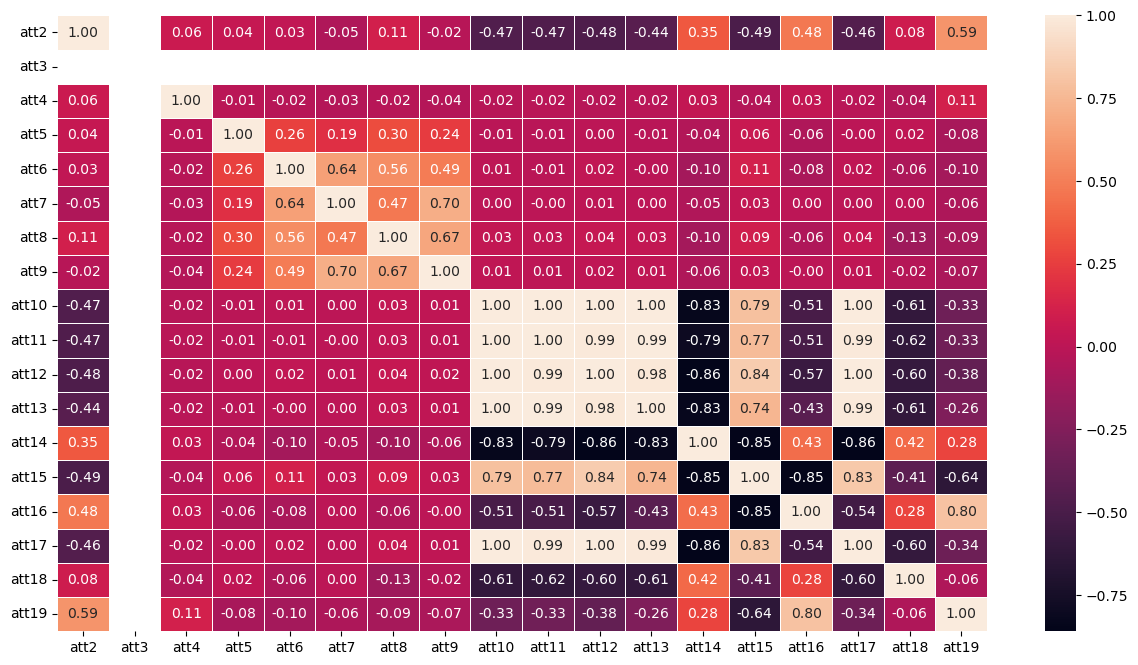

In [17]:
plt.figure(figsize=(15, 8))
plot = sn.heatmap(correlationPearsonComplete, annot=True, fmt=".2f", linewidths=.6)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_std = StandardScaler().fit_transform(X)
print(X_std)
print(X_std.shape)

[[ 0.02753863  0.         -0.35704732 ... -0.87060219  0.52020515
   0.15603807]
 [ 0.16673829  0.         -0.35704732 ... -0.85506669  0.48929742
   0.28354673]
 [ 0.27113803  0.         -0.35704732 ... -0.87578071  0.46322189
   0.25692603]
 ...
 [ 0.65393708  0.         -0.35704732 ... -0.7981032   0.49954012
  -0.40997389]
 [ 0.60173721  0.         -0.35704732 ... -0.76703221  0.33379929
  -0.37576162]
 [ 0.67133703  0.          2.41066847 ... -0.71265797  0.23235795
  -0.43133634]]
(2310, 18)


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca90 = PCA(n_components=0.90, whiten=True)
X_std_pca90 = pca90.fit_transform(X_std)

print(X_std_pca90)
print(X_std_pca90.shape)

[[-0.84985797 -0.33160136 -0.52261756 ... -0.12258883  0.01325685
  -0.80844669]
 [-0.87597341 -0.34512035 -0.42755832 ... -0.09363999  0.09040555
  -0.81235818]
 [-0.88764797 -0.31971832 -0.38211868 ... -0.04997689  0.16274495
  -0.7999434 ]
 ...
 [-0.7245825  -0.25328673 -0.53326825 ...  0.12034205  0.37580303
  -0.05209241]
 [-0.68107827 -0.03985473 -0.46861684 ...  0.08402104  0.59703008
   0.1690712 ]
 [-0.62642513 -0.12280381 -0.14208669 ... -0.71560416  0.31071144
  -0.01456282]]
(2310, 7)


In [22]:
df1 = pd.DataFrame(X_std_pca90)
df1.to_csv("data/Image/PCA90.csv", index=False)

In [23]:
pca10 = PCA(n_components=10, whiten=True)
X_std_pca10 = pca10.fit_transform(X_std)

print(X_std_pca10)
print(X_std_pca10.shape)

[[-0.84985797 -0.33160136 -0.52261756 ... -0.41091857 -0.43627711
   0.54662524]
 [-0.87597341 -0.34512035 -0.42755832 ... -0.49720315 -0.55851644
   0.76303572]
 [-0.88764797 -0.31971832 -0.38211868 ... -0.37526232 -0.54822992
   0.74893925]
 ...
 [-0.7245825  -0.25328673 -0.53326825 ...  0.19199999 -0.78189456
   0.40874537]
 [-0.68107827 -0.03985473 -0.46861684 ... -0.21333329 -0.291615
   0.47113013]
 [-0.62642513 -0.12280381 -0.14208669 ...  0.2940191  -0.36343075
   0.41738266]]
(2310, 10)


In [24]:
df1 = pd.DataFrame(X_std_pca10)
df1.to_csv("data/Image/PCA10.csv", index=False)